In [1]:
# Sesi 6

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./property_data.csv')

In [5]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
PID             8 non-null float64
ST_NUM          7 non-null float64
ST_NAME         9 non-null object
OWN_OCCUPIED    8 non-null object
NUM_BEDROOMS    7 non-null object
NUM_BATH        8 non-null object
SQ_FT           8 non-null object
dtypes: float64(2), object(5)
memory usage: 584.0+ bytes


In [7]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [8]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [9]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [10]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [11]:
missing_values = ['n/a', 'na', '--']

In [12]:
df = pd.read_csv('./property_data.csv', na_values = missing_values)

In [13]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [14]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [15]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [18]:
df['OWN_OCCUPIED'].value_counts()

Y     5
N     2
12    1
Name: OWN_OCCUPIED, dtype: int64

In [19]:
cnt = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt += 1

In [20]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [21]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [22]:
df.isnull().sum().sum()

12

In [23]:
df['ST_NUM'].fillna(125, inplace=True)

In [24]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [25]:
df.isnull().sum().sum()

10

In [27]:
df.loc[4, 'ST_NUM']

203.0

In [28]:
df.describe()

,PID,ST_NUM,NUM_BEDROOMS,SQ_FT
count,8.000000e+00,9.000000,5.000000,7.000000
mean,1.000050e+08,176.666667,2.400000,1100.000000
std,2.927700e+03,44.760474,0.894427,425.245027
min,1.000010e+08,104.000000,1.000000,700.000000
25%,1.000028e+08,125.000000,2.000000,825.000000
50%,1.000050e+08,201.000000,3.000000,950.000000
75%,1.000072e+08,207.000000,3.000000,1300.000000
max,1.000090e+08,215.000000,3.000000,1800.000000


In [29]:
median = df['NUM_BEDROOMS'].median()

In [30]:
df['NUM_BEDROOMS'].fillna(median, inplace=Trueue)

In [31]:
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [32]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [33]:
# Working with Excel

In [34]:
data = pd.ExcelFile('obes.xls')

In [35]:
data

In [36]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [37]:
data_age = data.parse('7.2', skiprows=4, skipfooter=14)

In [38]:
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [39]:
data_age.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

In [40]:
data_age.head

<bound method NDFrame.head of        Year    Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
0       NaN      NaN       NaN    NaN     NaN     NaN     NaN     NaN    NaN   
1   2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2   2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
3   2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
4   2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
5   2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
6   2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
7   2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
8   2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
9   2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
10  2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
11  2012/1

In [41]:
data_age.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [42]:
data_age.dropna(inplace=True)

In [43]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [44]:
data_age.set_index('Year', inplace=True)

In [45]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [46]:
data_age.plot()

In [47]:
%matplotlib inline

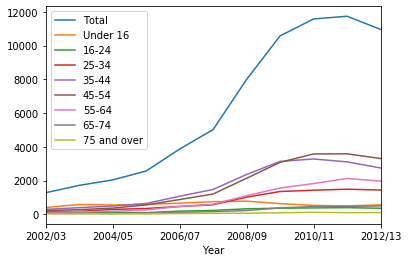

In [48]:
data_age.plot()

In [49]:
data_age_minus_total = data_age.drop('Total', axis=1)

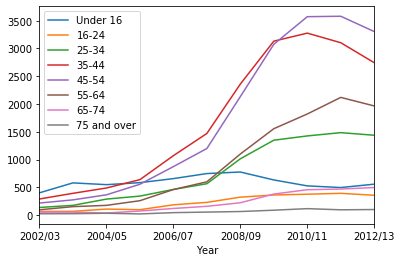

In [50]:
data_age_minus_total.plot()

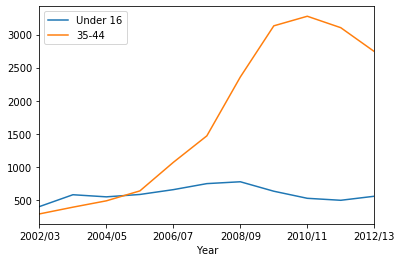

In [51]:
data_age['Under 16'].plot(label='Under 16', legend=True)
data_age['35-44'].plot(label='35-44', legend=True)

In [52]:
## Time Series

In [53]:
from datetime import datetime

In [55]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

In [56]:
date_rng.shape()

TypeError: 'tuple' object is not callable

In [57]:
date_rng.shape

(169,)

In [58]:
date_rng.head()

AttributeError: 'DatetimeIndex' object has no attribute 'head'

In [59]:
date_rng.head

AttributeError: 'DatetimeIndex' object has no attribute 'head'

In [60]:
df['data'] = np.random.randint(0, 100, size=len(date_rng))

ValueError: Length of values does not match length of index

In [61]:
df['data'] = np.random.randint(0, 100, size=(len(date_rng))

SyntaxError: unexpected EOF while parsing (<ipython-input-61-f5efc96f2541>, line 1)

In [62]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [63]:
df = pd.DataFrame(date_rng, columns=['date'])

In [64]:
df['data'] = np.random.randint(0, 100, size=(len(date_rng))

SyntaxError: unexpected EOF while parsing (<ipython-input-64-f5efc96f2541>, line 1)

In [65]:
df['data'] = np.random.randint(0, 100, size=(len(date_rng))

SyntaxError: unexpected EOF while parsing (<ipython-input-65-f5efc96f2541>, line 1)

In [66]:
df['data'] = np.random.randint(0, 100, size=(len(date_rng)))

In [67]:
df.head()

,date,data
0,2020-01-01 00:00:00,48
1,2020-01-01 01:00:00,17
2,2020-01-01 02:00:00,59
3,2020-01-01 03:00:00,85
4,2020-01-01 04:00:00,17


In [68]:
df['datetime'] = pd.to_datetime(df['date'])

In [69]:
df.head()

,date,data,datetime
0,2020-01-01 00:00:00,48,2020-01-01 00:00:00
1,2020-01-01 01:00:00,17,2020-01-01 01:00:00
2,2020-01-01 02:00:00,59,2020-01-01 02:00:00
3,2020-01-01 03:00:00,85,2020-01-01 03:00:00
4,2020-01-01 04:00:00,17,2020-01-01 04:00:00


In [71]:
df = df.set_index('datetime')

In [72]:
df.drop(['date'], axis=1, inplace=True)

In [73]:
df.head()

,data
datetime,
2020-01-01 00:00:00,48
2020-01-01 01:00:00,17
2020-01-01 02:00:00,59
2020-01-01 03:00:00,85
2020-01-01 04:00:00,17


In [74]:
df['2020-01-03']

,data
datetime,
2020-01-03 00:00:00,78
2020-01-03 01:00:00,9
2020-01-03 02:00:00,54
2020-01-03 03:00:00,18
2020-01-03 04:00:00,10
2020-01-03 05:00:00,28
2020-01-03 06:00:00,93
2020-01-03 07:00:00,74
2020-01-03 08:00:00,40


In [75]:
# Time series on Dataset

In [76]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')

In [77]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [78]:
opsd_daily.set_index('Date', inplace=True)

In [79]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [80]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [81]:
opsd_daily['Year'] = opsd_daily.index.year

In [82]:
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [83]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3
